# **Age Prediction Analysis of Abalone**

![Abalone](https://th.bing.com/th/id/OIP.kjXbPeQCb-ENERX2_y03owHaE7?rs=1&pid=ImgDetMain)

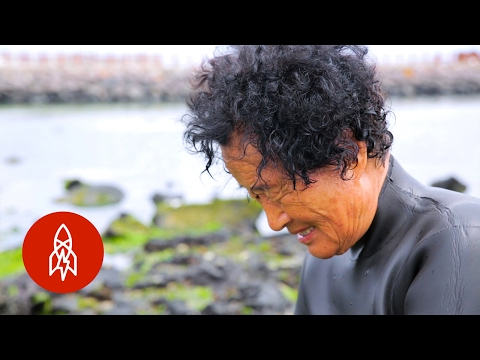

In [6]:
# https://www.youtube.com/watch?v=1ukb19NOOzQ

from IPython.display import YouTubeVideo
YouTubeVideo('1ukb19NOOzQ',800,600)

## Abalone Age Prediction Analysis

This notebook analyzes the abalone dataset to predict age using various physical characteristics. It includes descriptive analysis, correlation matrix, and linear regression.

### **What is Being Investigated:**
The focus of the investigation is to predict the age of abalones (**Rings** variable) based on their physical characteristics (such as length, diameter, whole weight, shucked weight, and others).

This is a typical **regression** problem where we aim to build a model that relates the independent variables (physical characteristics of the abalone) to the dependent variable (age in terms of rings).

### **Objectives of the Analysis:**
- **Explore the relationship between physical characteristics and abalone age** through correlation analysis.
- **Develop a predictive model** (e.g., using linear regression) to estimate abalone age based on the available characteristics.
- **Evaluate the model performance** using error metrics such as mean squared error (MSE) and coefficient of determination (R²).

Below, I detail the variables present in the analysis and what each one represents:

### Variables in the Analysis and their Representations:
1. **Sex**: Categorical variable indicating the sex of the abalone. Possible values:
   - **M** (Male): Male
   - **F** (Female): Female
   - **I** (Infant): Infant (young or unspecified)

2. **Length**: Continuous variable representing the maximum length of the abalone shell, measured in millimeters.

3. **Diameter**: Continuous variable representing the diameter of the abalone shell, measured perpendicularly to the length, in millimeters.

4. **Height**: Continuous variable representing the height of the abalone shell with meat, also measured in millimeters.

5. **Whole weight**: Continuous variable indicating the total weight of the abalone (including meat and shell), measured in grams.

6. **Viscera weight (Whole weight.1)**: Continuous variable representing the weight of the viscera (guts) of the abalone after being removed and drained, in grams.

7. **Shucked weight (Whole weight.2)**: Continuous variable indicating the weight of the abalone meat after removing the shell, measured in grams.

8. **Shell weight**: Continuous variable indicating the weight of the abalone shell after drying, in grams.

9. **Rings**: Continuous variable that is the target variable of the problem. Represents the number of rings present in the abalone shell, which is used to estimate age. To determine the age of the abalone in years, you must add 1.5 to the number of rings.

The analysis helps to understand how physical variables influence the age of abalones and to create a tool to estimate this age automatically, potentially applicable to biological and industrial studies.

## 1: Import Libraries and Load Data


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import joblib


In [8]:
# google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Loading Data for Training and Testing
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Thinkers/abalone/train.csv') #Update your drive path
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Thinkers/abalone/test.csv') #Update your drive path

In [10]:
# Check the dataframe
train_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [11]:
test_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [12]:
# datasets shape
train_df.shape, test_df.shape

((90615, 10), (60411, 9))

In [13]:
# features info
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 

(None, None)

In [14]:
# Checking for null values
train_df.isnull().sum(), test_df.isnull().sum()

(id                0
 Sex               0
 Length            0
 Diameter          0
 Height            0
 Whole weight      0
 Whole weight.1    0
 Whole weight.2    0
 Shell weight      0
 Rings             0
 dtype: int64,
 id                0
 Sex               0
 Length            0
 Diameter          0
 Height            0
 Whole weight      0
 Whole weight.1    0
 Whole weight.2    0
 Shell weight      0
 dtype: int64)

In [15]:
# Check for duplicate values
train_df.duplicated().sum(), test_df.duplicated().sum()

(0, 0)

## 2: Descriptive Analysis

In [16]:
# Descriptive Analysis
train_df.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


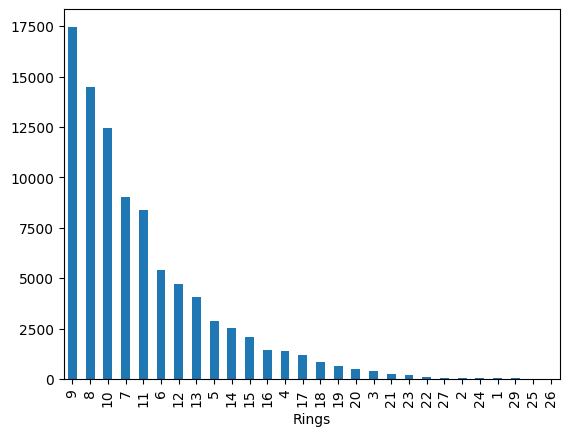

In [17]:
# Distribution of the Target Variable (Rings)

train_df['Rings'].value_counts().plot(kind='bar');

## 3: Correlation
A correlation matrix helps identify relationships between features and the target variable ('Rings').

From the correlation matrix, we can identify which features are most strongly correlated with 'Rings', guiding our selection for the regression model.


In [18]:
# PREPROCESSING: Transform categorical variables using label encoder

# Encode categorical variables
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.transform(test_df['Sex'])

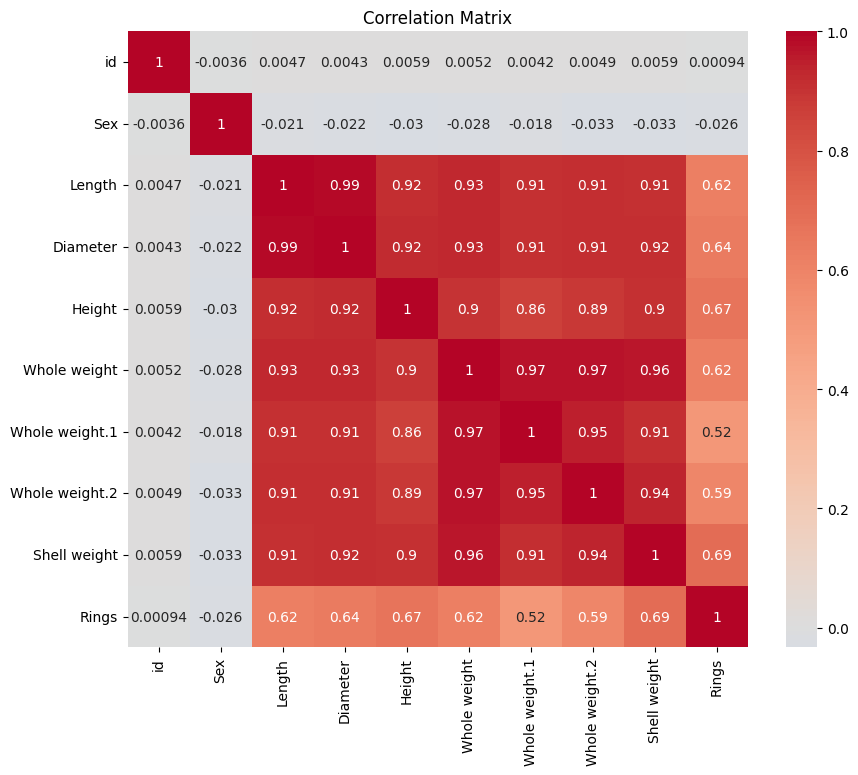

In [19]:
# Correlation matrix
correlation_matrix = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

The correlation analysis revealed the following results between the target variable **"Rings"** (representing abalone age) and the other variables:

1. **Shell weight** (Weight of the shell after drying): Correlation of **0.69**. This variable has the strongest correlation with the number of rings, indicating that the higher the shell weight, the greater the tendency for the abalone to be older.

2. **Height** (Height of the shell with meat): Correlation of **0.67**. A higher height is also associated with a higher number of rings, suggesting a significant positive correlation.

3. **Diameter** (Diameter of the shell): Correlation of **0.64**. A larger diameter tends to indicate an older abalone.

4. **Length** (Maximum length of the shell): Correlation of **0.62**. Length also has a positive relationship with abalone age.

5. **Whole weight** (Total weight of the abalone): Correlation of **0.62**. Like other weight measurements, total weight is positively related to age.

6. **Whole weight.2 - Shucked weight** (Weight of the meat): Correlation of **0.59**. This weight, which represents only the meat, also has a significant positive correlation with rings.

7. **Whole weight.1 - Viscera weight** (Weight of the viscera): Correlation of **0.52**. While still positive, this weight has a lower correlation with age.

8. **Sex** (Sex of the abalone): Correlation of **-0.026**. The sex variable has a very weak negative correlation with age, indicating that the sex of the abalone does not have a significant impact on the prediction of the number of rings.


### Conclusion:

Correlation analysis suggests that variables related to the size and weight of the abalone (such as **shell weight, height, diameter, and total weight**) have the strongest correlations with age (number of rings). These variables will be more important for predicting abalone age in a predictive model.

The variable **"Sex"** has little relevance in the correlation with age, suggesting that age variation between genders is small.


## 4: Linear Regression Model
We will create a linear regression model to predict 'Rings' using the continuous features from the dataset.

In [20]:
# Split data into features and target variable

X = train_df.drop(['id', 'Rings'], axis=1)
y = train_df['Rings']

X_test = test_df.drop('id', axis=1)

In [21]:
# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Regression Analysis:
- **Mean Squared Error (MSE)**: The Mean Squared Error is a metric that measures the average of the squared differences between the actual values and the predictions of a model. It quantifies how far, on average, the predictions are from the observed values.

- **R^2**: The Coefficient of Determination R^2 represents the proportion of variance in the dependent variable ('Rings') explained by the independent variables. A higher R^2 score indicates a better fit of the model. It ranges **between 0 and 1** (or can be negative if the model is worse than simply averaging the values).


In [22]:
# Creating the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Train the model and calculating mse and r2
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Displaying the mean squared error (MSE) and the coefficient of determination (R²)
print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')

MSE: 4.16
R^2: 0.59


For the results presented in the dataset, we have:

- **Mean Squared Error (MSE)**: 4.16
- **Coefficient of Determination \(R^2\)**: 0.59

### Overall Evaluation
- **Model Quality**: The \(R^2\) value of 0.59 suggests that the model is not ideal for capturing all the variability in the data, but it is reasonable. In many scenarios, especially with biological or social data, an \(R^2\) close to 0.6 can be considered acceptable.


In [23]:
# Make prediction
y_pred = model.predict(X_val)

intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept: {intercept:.2f}")
print(f"Slope: {slope:.2f}")

Intercept: 2.85
Slope: 0.02


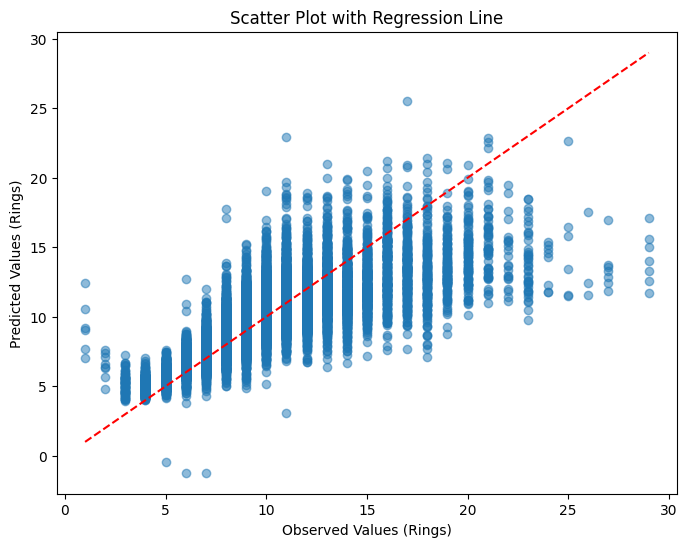

In [25]:
# Scatter Plot with Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel('Observed Values (Rings)')
plt.ylabel('Predicted Values (Rings)')
plt.title('Scatter Plot with Regression Line')
plt.show()

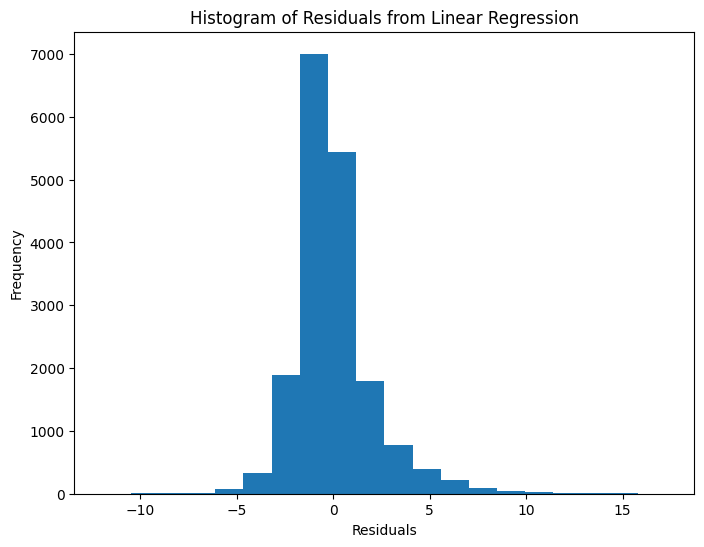

In [27]:
# Calculating residuals using the predictions on the validation set
residuals = y_val - y_pred

# Plotting the residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals from Linear Regression')
plt.show()

## 5: Salving the model


In [28]:
# Salve the model using joblib
joblib.dump(model, '/content/drive/MyDrive/Colab Notebooks/Data_Thinkers/abalone/regression')

['/content/drive/MyDrive/Colab Notebooks/Data_Thinkers/abalone/regression']

In [29]:
# Load the model
import joblib
best_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Data_Thinkers/abalone/regression')

# Data Example
data = {'Sex': ['Female'],
        'Length': [0.455],
        'Diameter': [0.365],
        'Height': [0.095],
        'Whole weight': [0.514],
        'Whole weight.1': [0.2245],
        'Whole weight.2': [0.101],
        'Shell weight': [0.15]}
predict_df = pd.DataFrame(data)

# Encode categoric features
le = LabelEncoder()
predict_df['Sex'] = le.fit_transform(predict_df['Sex'])

# Make prediction
prediction = best_model.predict(predict_df)

print("Rings' Prediction:", prediction)

Rings' Prediction: [8.24439645]


## 6: Conclusion
Based on the correlation analysis and the linear regression model, we can identify which variables are most influential in predicting the age of abalones. Further improvements may include using more complex models or feature engineering.

## 7: GUI

In [30]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox

In [31]:
#!pip install ipywidgets

In [32]:
# Loading the model
model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Data_Thinkers/abalone/train.csv')

# Create a dictionary to store feature names and their corresponding input widgets
feature_widgets = {}

# Import ipywidgets
import ipywidgets as widgets
from IPython.display import display

In [33]:
# Function to predict rings

def predict_rings(button):
    with output:
        try:
            input_values = []
            for feature in feature_names:
                widget = feature_widgets[feature]
                if isinstance(widget, widgets.Dropdown):
                    input_values.append(widget.value)
                else:
                    input_values.append(widget.value)

            # Create a DataFrame for prediction using the feature names
            input_data = pd.DataFrame([input_values], columns=feature_names)

            # Encode 'Sex' before prediction
            le = LabelEncoder()
            input_data['Sex'] = le.fit_transform(input_data['Sex'])

            prediction = model.predict(input_data)
            print(f"Predicted number of Rings: {prediction[0]}")

        except Exception as e:
            print(f"Prediction Error: {e}")

In [35]:
# Loading data from the 'train' dataset to get the feature names
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Thinkers/abalone/train.csv')
feature_names = train_df.columns.drop(['id', 'Rings'])

In [36]:
# Encode feature 'Sex'
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])

''' This line creates a dictionary called sex_encode that stores the mapping
    between the numerical labels and the original categories.
    This dictionary will be useful later if you need to convert the
    numerical labels back to their original categories ('M', 'F', 'I').
'''
sex_encode = {val: key for key, val in enumerate(le.classes_)}

In [37]:
from IPython.display import clear_output

# Create a GUI window using ipywidgets
output = widgets.Output()

# Function to create the input widget for the features
def create_input_widgets():
    for idx, feature in enumerate(feature_names):
        if feature == 'Sex':
            label = widgets.Label(value=feature)
            sex_options = list(sex_encode.keys())
            sex_dropdown = widgets.Dropdown(options=sex_options, description='')
            feature_widgets[feature] = sex_dropdown
            display(widgets.HBox([label, sex_dropdown]))
        else:
            label = widgets.Label(value=feature)
            entry = widgets.FloatText()
            feature_widgets[feature] = entry
            display(widgets.HBox([label, entry]))

# Function to create input widgets for features
def clear_inputs(button):
    for widget in feature_widgets.values():
        if isinstance(widget, widgets.Dropdown):
            widget.value = None  # clear dropdown
        else:
            widget.value = 0  # clear other widgets

In [38]:
# Create input widgets for features
create_input_widgets()

# Create Predict and Clear buttons using ipywidgets
predict_button = widgets.Button(description="Predict")
predict_button.on_click(predict_rings)  # Linka o botão à função 'predict_rings'

clear_button = widgets.Button(description="Clear")
clear_button.on_click(clear_inputs)

display(predict_button, clear_button, output)

Button(description='Predict', style=ButtonStyle())

Button(description='Clear', style=ButtonStyle())

Output()

* 'Sex': ['Female']
* 'Length': [0.455]
* 'Diameter': [0.365]
* 'Height': [0.095],
* 'Whole weight': [0.514],
* 'Whole weight.1': [0.2245],
* 'Whole weight.2': [0.101],
* 'Shell weight': [0.15]

Predicted Rings: [8.244396448642272]